**EXPLORATORY ANALYSIS OF THE DATASET AND PREPARING DATASET FOR MODELLING**

Here, we will be cleaning and analysing data of NABIL (Nabil Bank) dataset which is a commerical bank stock listed in NEPSE. The dataset has been collected from NepseAlpha, one of the most versatile stock market tracking tool of Nepal. NABIL dataset was chosen due ot it's consistent pattern in comparision to other sectors like HydroPower, MicroFinance andd such which will be a big factor while training the data.

**Breif about NABIL**

Nabil Bank Limited (stock symbol: NABIL) is a prominent commercial bank in Nepal, offering a comprehensive range of banking and financial services. Established in 1984, the bank has grown to become a leading player in the Nepalese banking sector. Its services include retail and corporate banking, trade finance, remittance, and more. As with any stock, investing in Nabil Bank carries inherent risks due to market fluctuations and changes in economic conditions. Investors should carefully assess their risk tolerance and conduct thorough research before making any investment decisions.

In [1]:
# IMPORTING NECESSARY LIBRARIES
from formulas import *
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# READING DATA INTO DATAFRAMES
nabil = pd.read_csv('../Data/NABIL.csv')
# PRINTING THE IMPORTED DATASET
print(nabil)

            Date    Open    High     Low   Close Percent Change  Volume
0     2013-07-22  1910.0  1915.0  1885.0  1885.0          -1.31    1031
1     2013-07-23  1885.0  1920.0  1870.0  1920.0           1.86     898
2     2013-07-24  1920.0  1900.0  1843.0  1890.0          -1.56    2886
3     2013-07-25  1890.0  1905.0  1880.0  1889.0          -0.05    1962
4     2013-07-28  1889.0  1918.0  1880.0  1905.0           0.85    2279
...          ...     ...     ...     ...     ...            ...     ...
2176  2023-02-22   674.8   689.5   664.2   678.9           2.48   57464
2177  2023-02-23   678.0   679.0   665.0   669.0          -1.46   47679
2178  2023-02-26   668.0   670.0   652.0   663.5          -0.82   57017
2179  2023-02-27   672.0   675.1   658.0   661.0          -0.38   41206
2180  2023-02-28   665.0   669.0   656.1   657.0          -0.61   31890

[2181 rows x 7 columns]


In [3]:
# CHANGING DATA COLUMN TO DATE-TIME FORMAT
nabil['Date'] = pd.to_datetime(nabil['Date'], utc=True)
# LIMITING DATA TO THE END OF 2022 AS 2023 ANNUAL YEAR IS NOT FINISHED.
nabil = nabil.loc[nabil.Date.dt.year < 2023]
# PRINTING THE MODIFIED DATASET
print(nabil)

                          Date    Open    High     Low   Close Percent Change  \
0    2013-07-22 00:00:00+00:00  1910.0  1915.0  1885.0  1885.0          -1.31   
1    2013-07-23 00:00:00+00:00  1885.0  1920.0  1870.0  1920.0           1.86   
2    2013-07-24 00:00:00+00:00  1920.0  1900.0  1843.0  1890.0          -1.56   
3    2013-07-25 00:00:00+00:00  1890.0  1905.0  1880.0  1889.0          -0.05   
4    2013-07-28 00:00:00+00:00  1889.0  1918.0  1880.0  1905.0           0.85   
...                        ...     ...     ...     ...     ...            ...   
2140 2022-12-22 00:00:00+00:00   809.0   811.0   800.1   810.0           0.37   
2141 2022-12-26 00:00:00+00:00   811.0   840.0   811.0   838.0           3.46   
2142 2022-12-27 00:00:00+00:00   847.0   860.0   834.0   842.0           0.48   
2143 2022-12-28 00:00:00+00:00   845.0   847.0   826.1   834.9          -0.84   
2144 2022-12-29 00:00:00+00:00   840.0   844.0   835.1   843.0           0.97   

      Volume  
0       1031

In [4]:
# REMOVING TIME FROM DATE-TIME
nabil['Date'] = nabil['Date'].dt.date
#SAVING THE DATASET
nabil.to_csv('../Data/NABILModifiedDate.csv', index=False)
#PRINTING THE MODIFIED DATASET
print(nabil)

            Date    Open    High     Low   Close Percent Change  Volume
0     2013-07-22  1910.0  1915.0  1885.0  1885.0          -1.31    1031
1     2013-07-23  1885.0  1920.0  1870.0  1920.0           1.86     898
2     2013-07-24  1920.0  1900.0  1843.0  1890.0          -1.56    2886
3     2013-07-25  1890.0  1905.0  1880.0  1889.0          -0.05    1962
4     2013-07-28  1889.0  1918.0  1880.0  1905.0           0.85    2279
...          ...     ...     ...     ...     ...            ...     ...
2140  2022-12-22   809.0   811.0   800.1   810.0           0.37   66052
2141  2022-12-26   811.0   840.0   811.0   838.0           3.46  110057
2142  2022-12-27   847.0   860.0   834.0   842.0           0.48  133855
2143  2022-12-28   845.0   847.0   826.1   834.9          -0.84  105429
2144  2022-12-29   840.0   844.0   835.1   843.0           0.97  110579

[2145 rows x 7 columns]


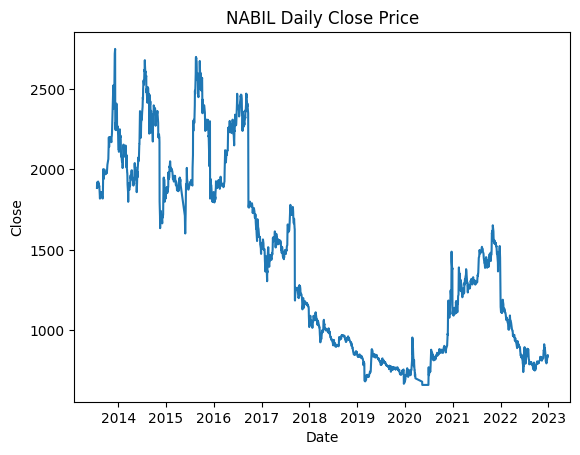

In [5]:
# PLOT HISTORY OF CLOSE PRICE OF NABIL
sns.lineplot(x = nabil.Date, y=nabil['Close'])
plt.title('NABIL Daily Close Price')
plt.savefig('../Images/EDA/NABIL Daily Close Price')

In [6]:
# VALIDATE THERE IS NO DUPLICATE DATES
print(nabil.index.is_unique)

True


**CALCULATE RETURNS AND VIEW DISTRIBUTIONS**

When you look at stocks, it's better to focus on how much they grow or shrink in percentage terms (returns) rather than just their price. A 2% increase in a 10,000 Rupees stock is different from a 2% increase in a 1,000 Rupees stock. The way stocks grow or shrink is always in a consistent range, so we can compare them better. We'll use a graph in the notebook to see this pattern.

In [7]:
# CALCULATING DAILY RETURNS
nabil['Day Return'] = calculate_returns(nabil['Close']) 

# CALCULATING DAILY LOG RETURNS
nabil['Log Day Return'] = compute_log_returns(nabil['Close'])

# DROPPING FIRST ROW AS THE NEWLY CALCULATED COLUMNS WILL BE N/A DUE TO NO PREVIOUS DATA
nabil = nabil.iloc[1:]

# SAVE THE DATASET
nabil.to_csv('../Data/NABILDailyReturns.CSV')

# CHECK THE DATAFRAME
nabil.tail()

,Date,Open,High,Low,Close,Percent Change,Volume,Day Return,Log Day Return
2140,2022-12-22,809.0,811.0,800.1,810.0,0.37,66052,0.003717,0.003711
2141,2022-12-26,811.0,840.0,811.0,838.0,3.46,110057,0.034568,0.033984
2142,2022-12-27,847.0,860.0,834.0,842.0,0.48,133855,0.004773,0.004762
2143,2022-12-28,845.0,847.0,826.1,834.9,-0.84,105429,-0.008432,-0.008468
2144,2022-12-29,840.0,844.0,835.1,843.0,0.97,110579,0.009702,0.009655


**VISUALIZING OUR DATA**

mean     -0.000128
median    0.000000
min      -0.269325
max       0.102439
var       0.000471
std       0.021703
Name: Day Return, dtype: float64


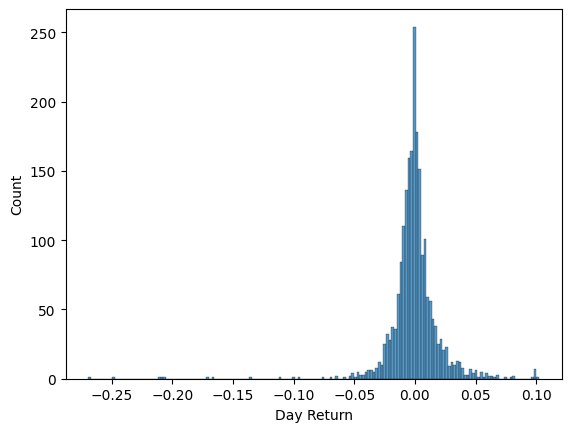

In [8]:
# PRINT OUT DAILY RETURN OF THE CLOSE ADJUSTED PRICE
sns.histplot(nabil['Day Return'])
plt.savefig('../Images/EDA/NABIL Daily Return Distribution')
print(nabil['Day Return'].agg(['mean', 'median', 'min', 'max', 'var', 'std']))


**NABIL DATASET DISTRIBUTION**
- The stock's daily returns are centered around zero, indicating no strong overall trend.
- It has seen significant gains (up to 10.24%) and losses (down to -26.93%) in a single day.
- The stock shows higher volatility (std: 0.021703) compared to the market (NEPSE) due to possibly less diversification.

**DAY OF THE WEEK RETURN ANALYSIS**

HERE WE WILL BE EVALUATING WHICH DAY OF THE WEEK GIVES THE BEST UPSIDE OR DOWNSIDE ? WE'LL SEE IF THE MYTH FRIDAY HAS THE MOST FLUCTUATION IN NEPSE IS TRUE OR NOT?

In [9]:
# CONVERTING DATA COLUMN TO DATE-TIME FORMAT
nabil['Date'] = pd.to_datetime(nabil['Date'], utc=True)\

# CREATE WEEKDAY COLUMN AND MAP CORRESPONDING NUMBER OUTPUT TO REAL NAME
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
nabil['Weekday'] = nabil['Date'].dt.dayofweek.map(dayOfWeek)
nabil.to_csv('../Data/NABILWeekday.CSV')
nabil.head()

,Date,Open,High,Low,Close,Percent Change,Volume,Day Return,Log Day Return,Weekday
1,2013-07-23 00:00:00+00:00,1885.0,1920.0,1870.0,1920.0,1.86,898,0.018568,0.018397,Tuesday
2,2013-07-24 00:00:00+00:00,1920.0,1900.0,1843.0,1890.0,-1.56,2886,-0.015625,-0.015748,Wednesday
3,2013-07-25 00:00:00+00:00,1890.0,1905.0,1880.0,1889.0,-0.05,1962,-0.000529,-0.000529,Thursday
4,2013-07-28 00:00:00+00:00,1889.0,1918.0,1880.0,1905.0,0.85,2279,0.008470,0.008434,Sunday
5,2013-07-29 00:00:00+00:00,1905.0,1910.0,1890.0,1900.0,-0.26,2562,-0.002625,-0.002628,Monday


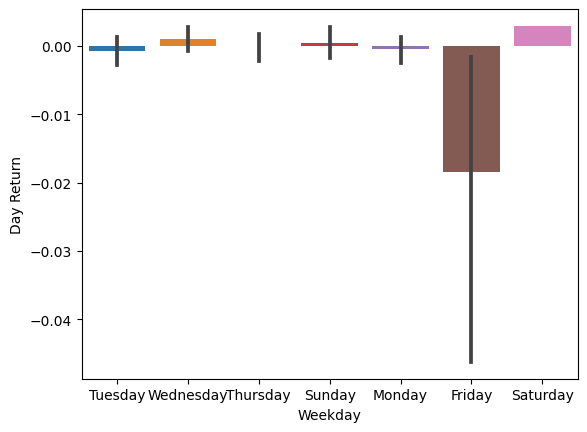

In [10]:
# CREATE NABIL BARPLOT SHOWING 1 DAY RETURN %
sns.barplot(x="Weekday", y="Day Return", data=nabil)
plt.savefig('../Images/EDA/NABIL WEEKDAY RETURNS')

**CONCLUSIONS**
It seems that it is true friday experiences the most fluctuation in the market.

**Seasonal Trend Decomposition Plot**


In [11]:
stl_nabil = nabil
stl_nabil = stl_nabil.set_index('Date')
stl_nabil = stl_nabil.resample('M').last()
stl_nabil = stl_nabil['Close']

In [12]:
nabil['Close'].head()

1    1920.0
2    1890.0
3    1889.0
4    1905.0
5    1900.0
Name: Close, dtype: float64

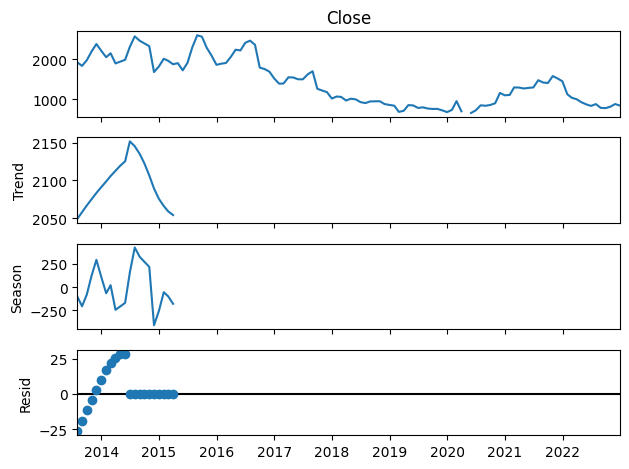

In [13]:
seasonal_trend_decomp_plot(dataframe = nabil,
                           target_series = 'Close',
                           freq = 'M',
                           seasonal_smoother = 13,
                           period = 12)
plt.savefig('../Images/EDA/NABIL SEASONAL TREND DECOMPOSITION PLOT')

**AUTO-CORRELATION**

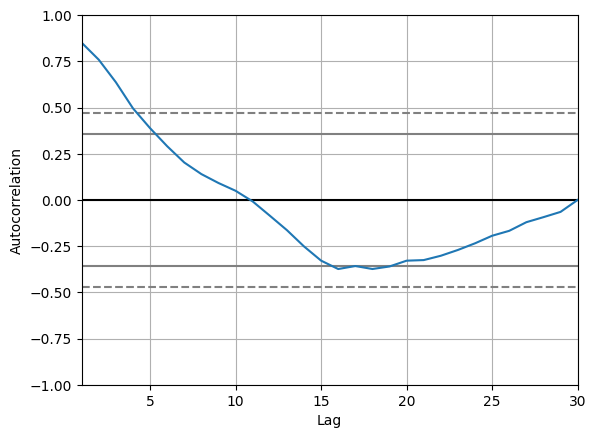

In [14]:
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation for nabil
autocorrelation_plot(nabil['Close'].iloc[:30])
plt.savefig('../Images/EDA/NABIL CORRELATION PLOT')


**TEST THE FIRST 10 DAYS**

In [15]:
# Establish empty list for for-loop
nabil_autocorr = []

# Loop through lag numbers to find the point with highest autocorrelation
for x in list(range(1,101)):
    nabil_autocorr.append(nabil['Close'].autocorr(lag=x))

# Show the index of the point with the largest autocorrelation value
# 0 indexed so add 1 for correct number of lags
lags = nabil_autocorr.index(max(nabil_autocorr)) + 1 
print('The best performing lag is number {}'.format(lags))

The best performing lag is number 1


**Conclusion**
This turned out exactly like our previous graph showed. An amost linear relationship with decreasing autocorrelation until lag. This means that the previous day is the best day to use to predict the next days price. However, with the average % change from the day before being almost 0, it's not a very good indicator.